# OBTENIENDO DATOS (GETTING DATA) Y SCRAPING DATA CON PYTHON.
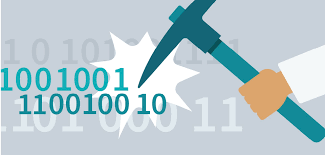

Para ser un científico de datos necesitas datos. De hecho, como científico de datos, pasará una fracciónde su tiempo adquiriendo, limpiando y transformando datos.
En este capítulo, veremos diferentes formas de introducir datos en Python y en los formatos correctos. 

## Contenido:<br>

### stdin y stdout


Si ejecuta sus scripts Python en la línea de comando, puede canalizar datos a través de ellos usando sys.stdin y sys.stdout. Por ejemplo, aquí hay un script que lee en líneas de texto y escupe los que coinciden con una expresión regular: 

In [2]:
# egrep.py
import sys, re
# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
# sys.argv es la lista de argumentos de línea de comandos
# sys.argv [0] es el nombre del programa en sí
# sys.argv [1] será la expresión regular especificada en la línea de comando
regex = sys.argv[1]
# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

Y aquí hay uno que cuenta las líneas que recibe y luego escribe el recuento:

In [7]:
# line_count.py
import sys
count = 0
for line in sys.stdin:
    count += 1
# print goes to sys.stdout
print(count)

0


Luego puede usarlos para contar cuántas líneas de un archivo contienen números. En Windows, usarías: <BR>
type SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

mientras que en un sistema Unix usarías:<br>
cat SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

El | es el carácter de la tubería, que significa "usar la salida del comando izquierdo como
entrada del comando correcto ". Puede construir canalizaciones de procesamiento de datos bastante elaboradas de esta manera.

Del mismo modo, aquí hay un script que cuenta las palabras en su entrada y escribe más
comunes:

In [11]:
# most_common_words.py
import sys
from collections import Counter
# pass in number of words as first argument

try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error
    
counter = Counter(word.lower()
                  for line in sys.stdin
                  for word in line.strip().split()
                  if word)

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



usage: most_common_words.py num_words
Traceback (most recent call last):
  File "<ipython-input-11-87f2f76bfc63>", line 7, in <module>
    num_words = int(sys.argv[1])
ValueError: invalid literal for int() with base 10: '-f'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/andres/Escritorio/PROYECTOS/entorno1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-87f2f76bfc63>", line 10, in <module>
    sys.exit(1) # non-zero exit code indicates error
SystemExit: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/andres/Escritorio/PROYECTOS/entorno1/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/andres/Escritorio/PROY

SystemExit: 1

después de lo cual podrías hacer algo como:<br>
C:\DataScience>type the_bible.txt | python most_common_words.py 10

### Lectura de archivos